## Neural Networks for multiclass classification

### Eval function, data & packages

In [1]:
# evaluation function

def accuracy(y_pred, y_true):
    '''
    input y_pred: ndarray of shape (N,)
    input y_true: ndarray of shape (N,)
    '''
    return (1.0 * (y_pred == y_true)).mean()

In [2]:
def plot_learning_curves(history):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    # accuracy learning curves
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'validation'], loc='upper left')
    # loss learning curves
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'test'], loc='upper right')
    fig.tight_layout()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import loadtxt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
x_train = loadtxt('processed_data/x_train.csv', delimiter=',')
x_validation = loadtxt('processed_data/x_validation.csv', delimiter=',')
y_train = loadtxt('processed_data/y_train.csv', delimiter=',')
y_validation = loadtxt('processed_data/y_validation.csv', delimiter=',')

print('X train shape: {} '.format(x_train.shape))
print('X validation shape: {} '.format(x_validation.shape))

X train shape: (1600, 1024) 
X validation shape: (109, 1024) 


### Data preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_validation = scaler.transform(x_validation)

x_train.round(3)

array([[0.094, 0.12 , 0.149, ..., 0.001, 0.001, 0.002],
       [0.557, 0.59 , 0.558, ..., 0.002, 0.002, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.251, 0.269, 0.265, ..., 0.001, 0.002, 0.002],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [6]:
from keras.utils import np_utils

#y_train = pd.get_dummies(Y)
y_train = np_utils.to_categorical(y_train)
y_validation = np_utils.to_categorical(y_validation)

y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## NN model

### Basic multiclass network with 3 layers

In [27]:
# Create model
model = Sequential()
model.add(Dense(15, input_dim = 1024, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'softmax')) # Softmax for multi-class classification

# Compile model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.SGD(learning_rate=0.01), # stochastic gradient descent 
              metrics = ['accuracy'])

# Fit saving history
history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), batch_size=10, epochs=100, verbose=0)

The data in history dict refers to: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


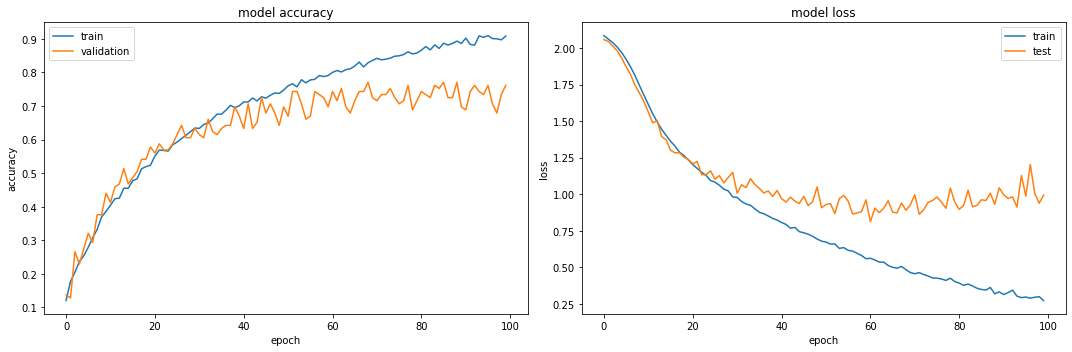

In [28]:
# list the data in history dict
print(f'The data in history dict refers to: {list(history.history.keys())}')

# plot learning curves
plot_learning_curves(history)

In [29]:
# make predictions on validation set
y_pred = model.predict(x_validation).round(0)

# evaluate on test set
accuracy(y_pred, y_validation)

0.944954128440367

### Network optimization

In [43]:
# create a function that returns accuracy given parameters

def create_nn(input_dimension,
              last_layer_nodes,
              last_layer_function, # params related to data
              
              n_layers,
              layers_nodes,
              act_function, # params related to nn structure

              loss_function,
              learning_rate_value,
              dropout_value, # params related to model
              
              number_epochs,
              batch_size_value, # params related to fit

              verbose = True):

    # Create model with dropout
    model = Sequential()
    model.add(Dropout(dropout_value))

    # Add layers to model
    model.add(Dense(layers_nodes, input_dim = input_dimension, activation = act_function))
    for i in range(0,n_layers-2):
        model.add(Dense(layers_nodes, activation = act_function))
    model.add(Dense(last_layer_nodes, activation = last_layer_function))

    # Compile model
    model.compile(loss = loss_function, 
                  optimizer = keras.optimizers.SGD(learning_rate=learning_rate_value),
                  metrics = ['accuracy'])

    # Fit saving history
    history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), 
                        batch_size=batch_size_value, epochs=number_epochs, verbose=0)

    # Make predictions on validation set
    y_pred = model.predict(x_validation).round(0)

    if verbose:

        # Print result and plot learning curves
        print(f'''PARAMS FOR NN STRUCTURE:
n_layers = {n_layers}, 
layers_nodes = {layers_nodes},
act_function = {act_function},
PARAMS RELATED TO MODEL:
loss_function = {loss_function},
learning_rate_value = {learning_rate_value},
dropout_value = {dropout_value}
PARAMS RELATED TO FIT:
batch_size_value = {batch_size_value},
number_epochs = {number_epochs}
''')
        print(f'Accuracy of the neural network: {accuracy(y_pred, y_validation)}')
        plot_learning_curves(history)

    return accuracy(y_pred, y_validation)

PARAMS FOR NN STRUCTURE:
n_layers = 3, 
layers_nodes = 15,
act_function = relu,
PARAMS RELATED TO MODEL:
loss_function = categorical_crossentropy,
learning_rate_value = 0.01,
dropout_value = 0.2
PARAMS RELATED TO FIT:
batch_size_value = 10,
number_epochs = 100

Accuracy of the neural network: 0.9506880733944955


0.9506880733944955

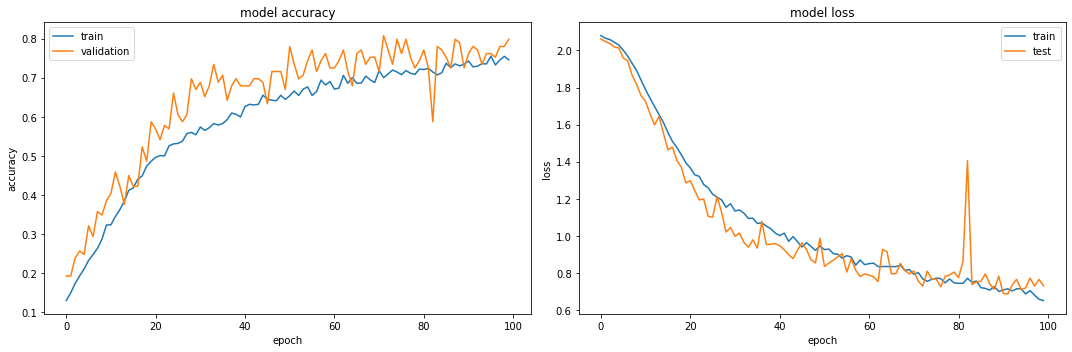

In [44]:
create_nn(input_dimension = 1024 ,last_layer_nodes = 8, last_layer_function = 'softmax', loss_function = 'categorical_crossentropy', # params for our challenge
          n_layers = 3, layers_nodes =15, act_function = 'relu', # params for nn structure
          learning_rate_value = 0.01, dropout_value = 0.2, # params related to model
          batch_size_value = 10, number_epochs = 100 # params related to fit 
          )